In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap

In [2]:
agg_data = pd.read_csv('agg_data.csv')

In [3]:
agg_data.head()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
agg_data.drop(columns=['Unnamed: 0','Unnamed: 1'],inplace=True)

# 1 item

In [5]:
each_zone = agg_data[agg_data>0].sum()

In [6]:
print('Всего {} ячейки из которых был сделан хотя бы один заказ'.format(each_zone[each_zone==0].shape[0]))

Всего 1283 ячейки из которых был сделан хотя бы один заказ


# 2 item

In [7]:
data = pd.read_csv('filt.csv')

In [8]:
ESLo = -73.985428
ESLa = 40.748817

In [9]:
regions = pd.read_csv(r'C:\Users\preductor\Documents\MachineLearning\6_course\Time series analysis\regions.csv',
                      sep=';')
regions.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [10]:
biny = sorted(regions.south.unique())
binx = sorted(regions.west.unique())
biny.append(regions.north.max())
binx.append(regions.east.max())

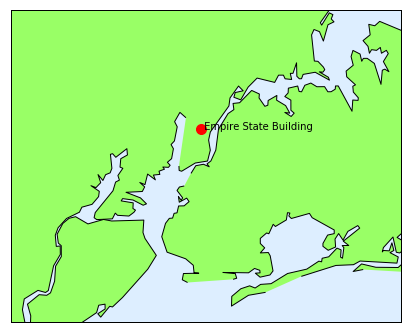

In [11]:
import warnings
warnings.simplefilter("ignore")

plt.figure(figsize=(7,7))
m = Basemap(projection='gnom', lat_0=np.mean(biny), lon_0=np.mean(binx),
                width=50000, height=40000, resolution='h')

m.fillcontinents(color="#99FF66", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcoastlines()
m.shadedrelief(scale=0.5)

E_lon, E_lat = m(-73.985428, 40.748817)
plt.plot(E_lon, E_lat, 'ok', markersize=10, color='red')
plt.text(E_lon, E_lat, ' Empire State Building', fontsize=10);

# 3 item

In [12]:
regions['trips'] = np.nan
for i in regions.index:
    regions.loc[i,'trips'] = each_zone.loc[str(regions.loc[i,'region'])]

In [13]:
regions.head()

,region,west,east,south,north,trips
0,1,-74.25559,-74.244478,40.496120,40.504508,0.0
1,2,-74.25559,-74.244478,40.504508,40.512896,0.0
2,3,-74.25559,-74.244478,40.512896,40.521285,0.0
3,4,-74.25559,-74.244478,40.521285,40.529673,0.0
4,5,-74.25559,-74.244478,40.529673,40.538061,0.0


In [14]:
d = pd.pivot_table(regions, values='trips', index=['west'],
                                 columns=['south'],  fill_value=0)

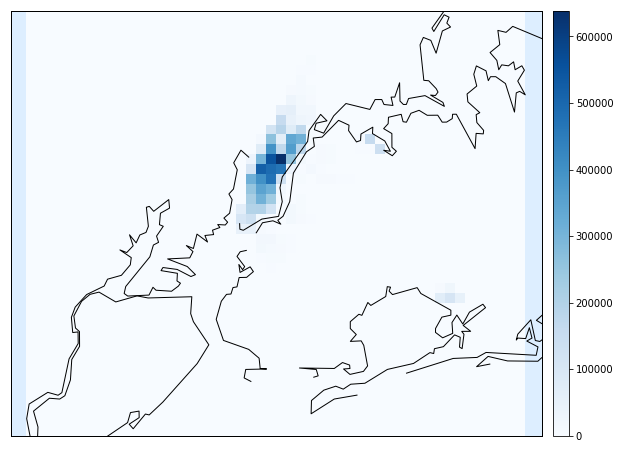

In [15]:
plt.figure(figsize=(10,10))
m = Basemap(projection='gnom', lat_0=np.mean(biny), lon_0=np.mean(binx),
                width=50000, height=40000, resolution='h')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcoastlines()
m.shadedrelief(scale=0.5)

x,y = m(binx, biny)

cs = m.pcolormesh(x,y,d.T.values, cmap='Blues')
m.colorbar(cs, size='3%')


# 4 item 

In [16]:
import folium

In [17]:
m = folium.Map(location=[40.689247, -74.044502], zoom_start=13)
folium.Marker(
    location=[40.689247, -74.044502],
    popup='Statue of Liberty').add_to(m)

In [18]:
m

# 5,6 item 

In [19]:
from folium.plugins import HeatMap

In [20]:
regions['trips_per_hour'] = regions.trips/31./24.

In [21]:
list_of_more_5 = regions[regions.trips_per_hour>=5].region.values

In [22]:
print('Ячеек из которых вообще совершались поездки за этот месяц всего {}'.format(len(list_of_more_5)))

Ячеек из которых вообще совершались поездки за этот месяц всего 102


## -------------------------------------------------------------------------------------------------

In [32]:
data_more_5 = data[data['region'].isin(list_of_more_5)].loc[:,['pickup_latitude','pickup_longitude']]

In [24]:
m3 = folium.Map(location=[40.748817, -73.985428], zoom_start=11)

In [25]:
HeatMap(data_more_5.values, radius=10).add_to(m3)

In [26]:
m3

Весьма затратно получается по времени. Пробовал разобраться как арендовать вычислительные мощности на AWS, так и не понял;) Может подскажете чем лучше пользоваться Amazon Web Services, Google Cloud или еще чем- буду весьма признателен, поскольку комп перегружается уже сейчас. Не представляю как обрабатывать годовой период на домашнем ПК. Еще из-за Jupiter иногда виснет вся система, навярняка есть IDE где на обработку кода не кидаются все ресурсы, что логично. Если кто знает- подскажите

In [38]:
def scatter(lon, lat):
    plt.figure(figsize=(15,15))
    m = Basemap(projection='gnom', lat_0=np.mean(biny), lon_0=np.mean(binx),
                    width=50000, height=40000, resolution='h')

    m.fillcontinents(color="#99FF66", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    m.shadedrelief(scale=0.5)


    x, y = m(lon, lat)
    m.scatter(x=x, y=y, s=1,
              marker='o', color='blue', zorder=5)

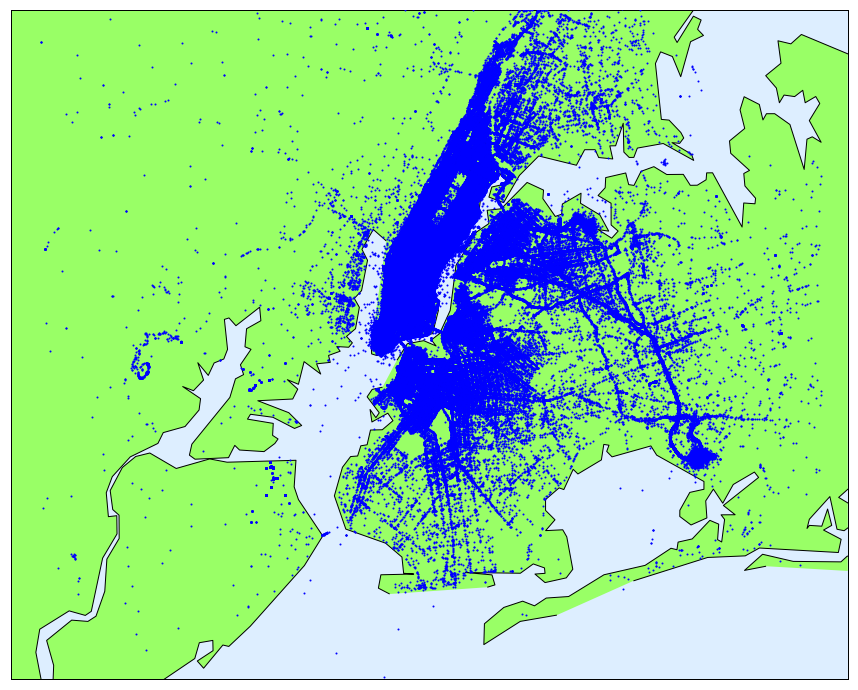

In [30]:
scatter(data.pickup_longitude.values, data.pickup_latitude.values)

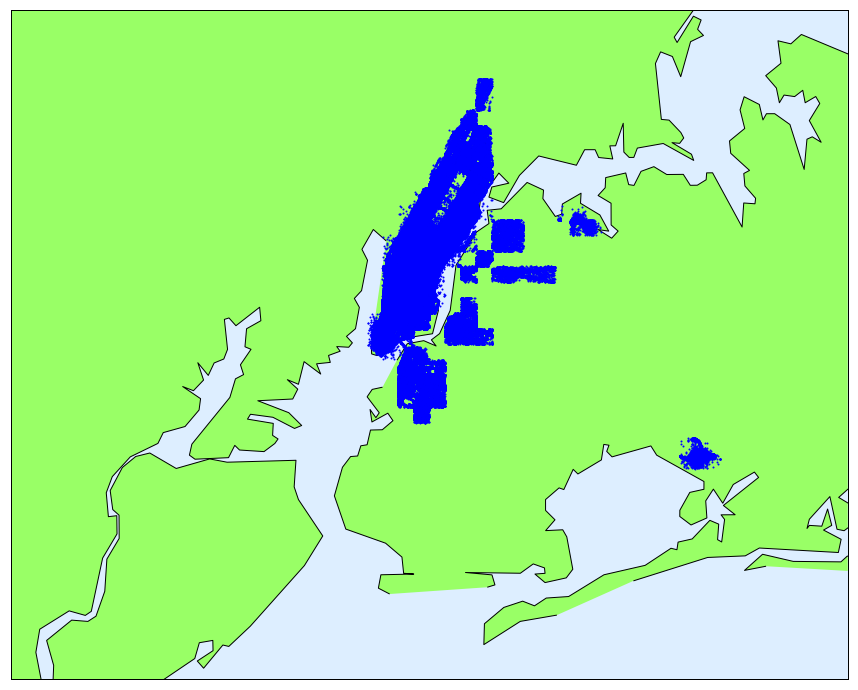

In [39]:
scatter(data_more_5.pickup_longitude.values, data_more_5.pickup_latitude.values)

Видим что погрешность геолокации существует, но ее значение пренебрежительно мало, тем более, что функции плотности распределения, такие как HeatMap, сводят на нет ее влияние на отображение данных